In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Supplementary_file_1.tps
# LM= Landmarks (number of coordenates)
dino = []
with open('Supplementary_file_1.tps') as tps:
    for line in tps:
        if line.startswith('LM='):
            # A new block of data
            n = int(line.split('=')[1])
            dino.append([tps.readline().split() for _ in range(n) ])
dino = np.array(dino, dtype=float)
print(dino.shape)

(40, 56, 2)


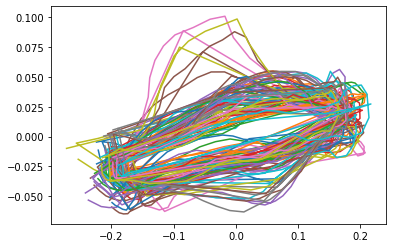

In [14]:
for entry in dino:
    plt.plot(entry[:, 0], entry[:, 1])
plt.show()

In [16]:
def msd2(a, b):
    """mean squared difference/displacement"""
    distsq = (a**2).sum() + (b**2).sum()
    distsq -= np.linalg.svd(a.T @ b, compute_uv=False).sum()
    return distsq / len(a)

D = np.zeros((len(dino), len(dino)))
# naive approach
for i1, d1 in enumerate(dino):
    for i2, d2 in enumerate(dino):
        D[i1, i2] = msd2(d1, d2)

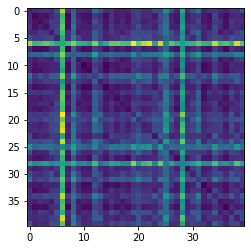

In [17]:
plt.imshow(D)
plt.show()

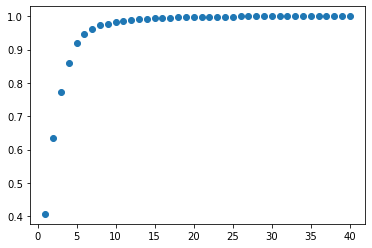

In [26]:
m = D.mean(axis=0)
A = - 0.5 * (D - m[:, None] - m[None, :] + m.mean()) # inner products
# eigenvector decomposition
vals, vecs = np.linalg.eig(A) # no order, use eigh(A)
order = vals.argsort()[::-1] # orders the values

# plt.scatter(np.arange(len(vals)) + 1, vals[order])
plt.scatter(np.arange(len(vals)) + 1, vals[order].cumsum()/vals.sum())
plt.show()